# <en><center>Exploratory Data Analysis</center></en>

## Table of Contents
- [Libraries](#Libraries)
- [Loading Data in Python](#Loading-Data-in-Python)
- [Dataset Preparation](#Dataset-Preparation)
- [Outliers](#Outliers)
- [Histograms](#Histograms)
- [Beeswarm Plots](#Beeswarm-Plots)
- [Box Plots](#Box-Plots)
- [Empirical Cumulative Distribution Functions](#Empirical-Cumulative-Distribution-Functions)
- [N Dimension Analysis](#N-Dimension-Analysis)
    - [N Dimension Scatter Matrix](#N-Dimension-Scatter-Matrix)
    - [N Dimension Correlation](#N-Dimension-Correlation)
- [2D Histograms](#2D-Histograms)

## Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import pickle

## Loading Data in Python

#### Datasets

In [3]:
filename = "C:\\Users\\pyria\\OneDrive\Documents\\\
Personal Development\Python\\\
Bootcamps\\Python for Statistical Analysis\\\
LoadingDatasets\\load.csv"

In [5]:
data = pd.read_csv(filename)

In [6]:
data.head()

,A,B,C,D,E
0,1.276,21.400,63.957,216.204,528
1,1.002,21.950,61.697,204.484,514
2,1.114,22.454,63.522,205.608,514
3,1.133,22.494,61.590,206.565,501
4,0.845,21.654,63.729,201.289,532


In [10]:
cols = None 
data2 = []
with open(filename) as f:
    for line in f.readlines():
        vals = line.replace("\n", "").split(",")
        if cols is None:
            cols = vals
        else:
            data2.append([float(x) for x in vals])
            
d0 = pd.DataFrame(data2, columns = cols)
print(d0.dtypes)

d0.head()
            

A    float64
B    float64
C    float64
D    float64
E    float64
dtype: object


,A,B,C,D,E
0,1.276,21.400,63.957,216.204,528.0
1,1.002,21.950,61.697,204.484,514.0
2,1.114,22.454,63.522,205.608,514.0
3,1.133,22.494,61.590,206.565,501.0
4,0.845,21.654,63.729,201.289,532.0


#### Loading Data with Numpy

In [11]:
d1 = np.loadtxt(filename, skiprows = 1,delimiter = ",")
print(d1.dtype)
print(d1[:5,:])

float64
[[  1.276  21.4    63.957 216.204 528.   ]
 [  1.002  21.95   61.697 204.484 514.   ]
 [  1.114  22.454  63.522 205.608 514.   ]
 [  1.133  22.494  61.59  206.565 501.   ]
 [  0.845  21.654  63.729 201.289 532.   ]]


In [12]:
d2 = np.genfromtxt(filename, delimiter = ",",names = True, dtype = None)
print(d2.dtype)
print(d2[:5])

[('A', '<f8'), ('B', '<f8'), ('C', '<f8'), ('D', '<f8'), ('E', '<i4')]
[(1.276, 21.4  , 63.957, 216.204, 528)
 (1.002, 21.95 , 61.697, 204.484, 514)
 (1.114, 22.454, 63.522, 205.608, 514)
 (1.133, 22.494, 61.59 , 206.565, 501)
 (0.845, 21.654, 63.729, 201.289, 532)]


#### Loading Data with Pickle

In [15]:
with open("C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\Python\\\
Bootcamps\\Python for Statistical Analysis\\LoadingDatasets\\load_pickle.pickle","rb") as f:
    d4 = pickle.load(f)
print(d4.dtypes)
d4.head()

A    float64
B    float64
C    float64
D    float64
E      int32
dtype: object


,A,B,C,D,E
0,1.276405,21.400157,63.957476,216.204466,528
1,1.002272,21.950088,61.697286,204.483906,514
2,1.114404,22.454274,63.522075,205.608375,514
3,1.133367,22.494079,61.589683,206.565339,501
4,0.844701,21.653619,63.728872,201.289175,532


## Dataset Preparation

### Dataset

In [18]:
data_set = "C:\\Users\\pyria\\OneDrive\\Documents\\\
Personal Development\\Python\\Bootcamps\\\
Python for Statistical Analysis\\\
PreparingDatasets\\Diabetes.csv"

In [19]:
df = pd.read_csv(data_set)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
df2 = df[["Glucose","BMI","Age", "Outcome"]]

In [25]:
df2.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [27]:
df2.describe()

,Glucose,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000
mean,120.894531,31.992578,33.240885,0.348958
std,31.972618,7.884160,11.760232,0.476951
min,0.000000,0.000000,21.000000,0.000000
25%,99.000000,27.300000,24.000000,0.000000
50%,117.000000,32.000000,29.000000,0.000000
75%,140.250000,36.600000,41.000000,1.000000
max,199.000000,67.100000,81.000000,1.000000


- We need to remove the 0s in the Glucose and BMI columns.
- The 0s represent null values that were replaced with 0.

In [32]:
df2.columns

Index(['Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

- We choose all the rows up until the last one
- The ~ turns values that are true into false and false values into true

In [37]:
(df2[df2.columns[:-1]] == 0)

,Glucose,BMI,Age
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
763,False,False,False
764,False,False,False
765,False,False,False
766,False,False,False


This is how to remove rows with 0 as an entry.

In [36]:
df3 = df2.loc[~(df2[df2.columns[:-1]] == 0).any(axis = 1)]
df3.describe()

,Glucose,BMI,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000
mean,121.941489,32.454654,33.312500,0.351064
std,30.601198,6.928926,11.709395,0.477621
min,44.000000,18.200000,21.000000,0.000000
25%,99.750000,27.500000,24.000000,0.000000
50%,117.000000,32.300000,29.000000,0.000000
75%,141.000000,36.600000,41.000000,1.000000
max,199.000000,67.100000,81.000000,1.000000


If we use the mean on each column:
- we find that those with diabetes have a higher age, BMI and blood glucose levels.

In [38]:
df3.groupby("Outcome").mean()

,Glucose,BMI,Age
Outcome,,,
0,110.825820,30.876434,31.309426
1,142.488636,35.371970,37.015152


Use the generic aggregator function:
- Parse in a dictionary that links the column name to the aggregate method that I want to use.
- This allows you to use aggregate functions on each column.

In [42]:
df3.groupby("Outcome").agg({"Glucose": "mean", "BMI": "median", "Age": "sum"})

,Glucose,BMI,Age
Outcome,,,
0,110.825820,30.10,15279
1,142.488636,34.25,9772


In [39]:
df3.groupby("Outcome").agg(["mean","median"])

Glucose               BMI               Age       
               mean median       mean median       mean median
Outcome                                                       
0        110.825820  107.5  30.876434  30.10  31.309426   27.0
1        142.488636  140.5  35.371970  34.25  37.015152   36.0

This is how to seperate the groups.

In [43]:
positive = df3.loc[df3["Outcome"] == 1]
negative = df3.loc[df3["Outcome"] == 0]
print(positive.shape, negative.shape)

(264, 4) (488, 4)


## Outliers

### Datasets

(1010,) (1010, 2)


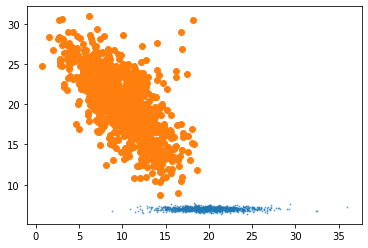

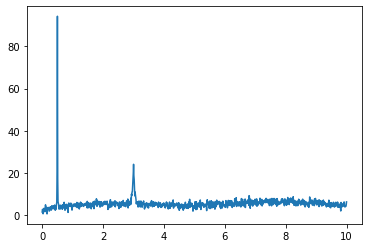

In [48]:
outlier_1d = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Python for Statistical Analysis\\Outliers\\outlier_1d.txt"
outlier_2d = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Python for Statistical Analysis\\Outliers\\outlier_2d.txt"
outlier_curve = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Python for Statistical Analysis\\Outliers\\outlier_curve.txt"

d1 = np.loadtxt(outlier_1d)
d2 = np.loadtxt(outlier_2d)
d3 = np.loadtxt(outlier_curve)
print(d1.shape, d2.shape)

plt.scatter(d1, np.random.normal(7,0.2, size = d1.size),s = 1, alpha = 0.5)
plt.scatter(d2[:,0],d2[:,1])
plt.show()
plt.plot(d3[:,0],d3[:,1])

Rejection 5 points
z-score of 3 corresponds to a prob of 0.27%


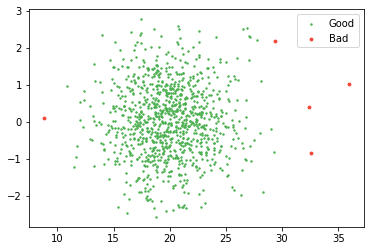

In [52]:
mean, std = np.mean(d1), np.std(d1)
z_score = np.abs((d1 - mean)/ std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
from scipy.stats import norm
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=d1.size)
plt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(d1[~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend();

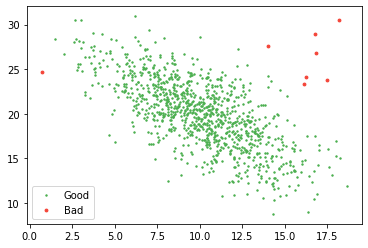

In [53]:
from scipy.stats import multivariate_normal as mn

mean, cov = np.mean(d2, axis=0), np.cov(d2.T)
good = mn(mean, cov).pdf(d2) > 0.01 / 100

plt.scatter(d2[good, 0], d2[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good, 1], s=8, label="Bad", color="#F44336")
plt.legend();

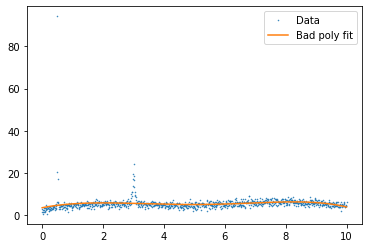

In [54]:
xs, ys = d3.T
p = np.polyfit(xs, ys,deg=5)
ps = np.polyval(p, xs)
plt.plot(xs, ys, ".", label="Data", ms=1)
plt.plot(xs, ps, label="Bad poly fit")
plt.legend();

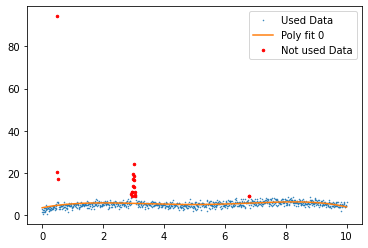

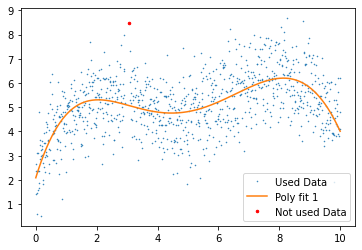

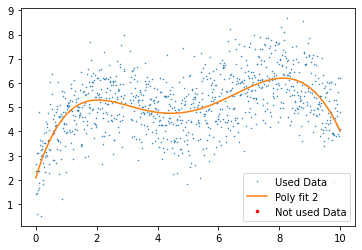

In [55]:
x, y = xs.copy(), ys.copy()
for i in range(5):
    p = np.polyfit(x, y, deg=5)
    ps = np.polyval(p, x)
    good = y - ps < 3  # only remove positive outliers
    
    x_bad, y_bad = x[~good], y[~good]
    x, y = x[good], y[good]
    
    plt.plot(x, y, ".", label="Used Data", ms=1)
    plt.plot(x, np.polyval(p, x), label=f"Poly fit {i}")
    plt.plot(x_bad, y_bad, ".", label="Not used Data", ms=5, c="r")
    plt.legend()
    plt.show()
    
    if (~good).sum() == 0:
        break

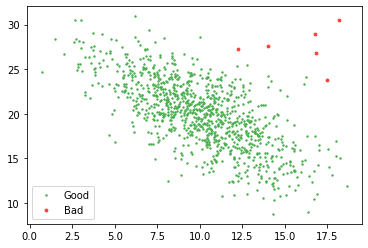

In [56]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)
good = lof.fit_predict(d2) == 1
plt.scatter(d2[good, 0], d2[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good, 1], s=8, label="Bad", color="#F44336")
plt.legend();

## Histograms

### Dataset

In [2]:
example_dataset = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Python\\Bootcamps\\Python for Statistical Analysis\\1D\\example_1.txt"
example_dataset2 = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Python\\Bootcamps\\Python for Statistical Analysis\\1D\example_2.txt"

d1 = np.loadtxt(example_dataset)
d2 = np.loadtxt(example_dataset2)

print(d1.shape, d2.shape)

(500,) (500,)


Plots

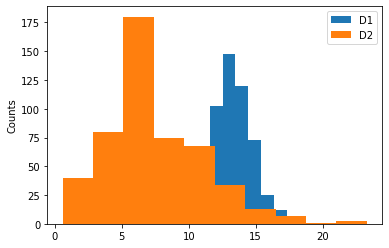

In [10]:
plt.hist(d1, label = "D1")
plt.hist(d2, label = "D2")
plt.legend()
plt.ylabel("Counts")

Create equally spaced bins using the np.linspace method

Text(0, 0.5, 'Counts')

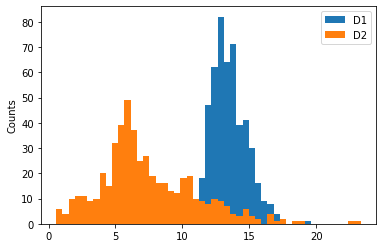

In [18]:
bins_space = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
counts1m, _, _ = plt.hist(d1, bins = bins_space, label = "D1")
plt.hist(d2,bins = bins, label = "D2")
plt.legend()
plt.ylabel("Counts")

Change the scale of the distributions into probability density distributions by adding the density argument

Text(0, 0.5, 'Probability')

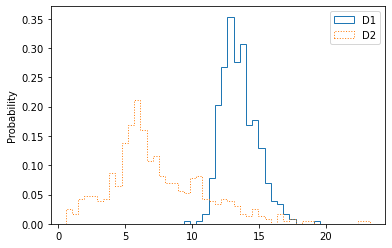

In [24]:
bins_space = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
plt.hist(d1, bins = bins_space, label = "D1", density = True, histtype = "step", linewidth = 1)
plt.hist(d2,bins = bins_space, label = "D2", density = True, histtype = "step", linestyle = ":")
plt.legend()
plt.ylabel("Probability")

Stacked histogram plot
- This stacked bar plot is clutter

Text(0, 0.5, 'Probability')

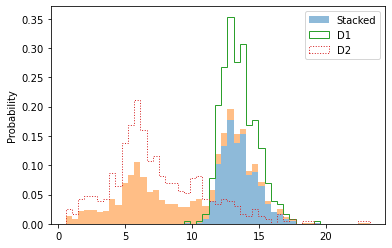

In [27]:
bins_space = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
plt.hist([d1,d2], bins = bins, label = "Stacked", density = True, histtype = "barstacked", alpha = 0.5)
plt.hist(d1, bins = bins_space, label = "D1", density = True, histtype = "step", linewidth = 1)
plt.hist(d2,bins = bins_space, label = "D2", density = True, histtype = "step", linestyle = ":")
plt.legend()
plt.ylabel("Probability")

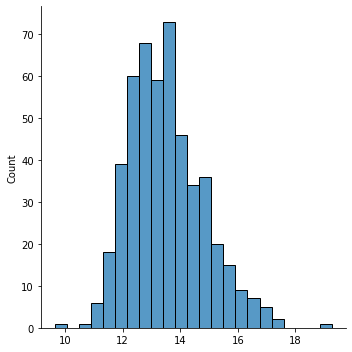

In [9]:
sns.displot(d1)
plt.show()

## Bee Swarm Plots

#### Dataset

In [3]:
example_dataset = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Python\\Bootcamps\\Python for Statistical Analysis\\1D\\example_1.txt"
example_dataset2 = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Python\\Bootcamps\\Python for Statistical Analysis\\1D\example_2.txt"

d1 = np.loadtxt(example_dataset)
d2 = np.loadtxt(example_dataset2)

print(d1.shape, d2.shape)

(500,) (500,)


In [4]:
dataset = pd.DataFrame({
        "value": np.concatenate((d1,d2)),
        "type": np.concatenate((np.ones(d1.shape), np.zeros(d2.shape)))
})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1000 non-null   float64
 1   type    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [5]:
dataset.head()

,value,type
0,13.995,1.0
1,13.125,1.0
2,13.508,1.0
3,14.220,1.0
4,13.478,1.0


C:\Users\pyria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pyria\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='value'>

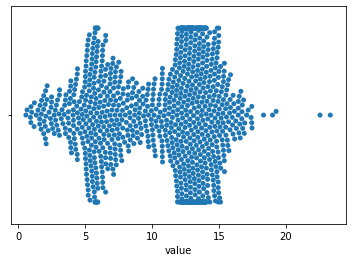

In [30]:
sns.swarmplot(dataset["value"])

Seperate the data

- The utility of a beeswarm plot increases as the data becomes more categorical.

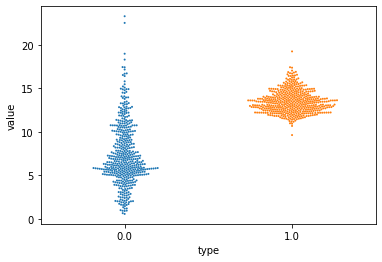

In [38]:
sns.swarmplot( x = "type", y = "value", data = dataset, size = 2);

## Box Plots

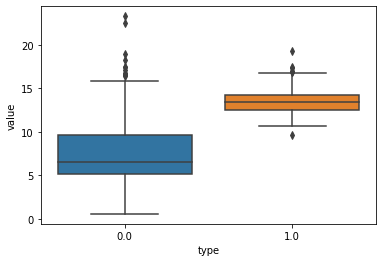

In [37]:
sns.boxplot( x = "type", y = "value", data = dataset);


<AxesSubplot:xlabel='type', ylabel='value'>

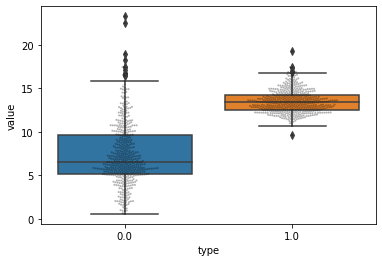

In [40]:
sns.boxplot( x = "type", y = "value", data = dataset);
sns.swarmplot(x = "type", y = "value", data = dataset, size = 2,  color = "k", alpha = 0.3)

<AxesSubplot:xlabel='type', ylabel='value'>

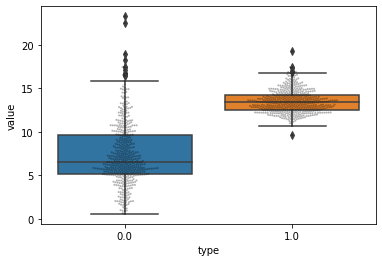

In [40]:
sns.boxplot( x = "type", y = "value", data = dataset);
sns.swarmplot(x = "type", y = "value", data = dataset, size = 2,  color = "k", alpha = 0.3)

The whis argument adjusts the whiskers in a box plot

<AxesSubplot:xlabel='type', ylabel='value'>

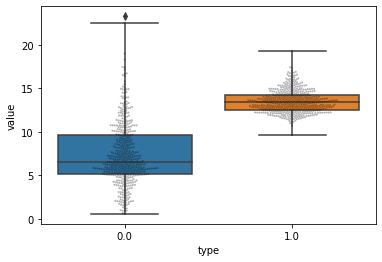

In [7]:
sns.boxplot( x = "type", y = "value", data = dataset, whis = 3.0);
sns.swarmplot(x = "type", y = "value", data = dataset, size = 2,  color = "k", alpha = 0.3)

## Violin Plots

<AxesSubplot:xlabel='type', ylabel='value'>

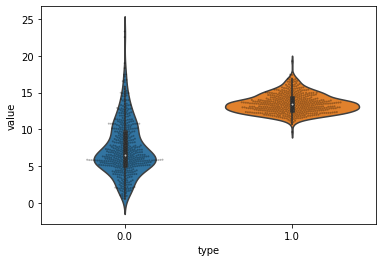

In [6]:
sns.violinplot( x = "type", y = "value", data = dataset, whis = 3.0);
sns.swarmplot(x = "type", y = "value", data = dataset, size = 2,  color = "k", alpha = 0.3)

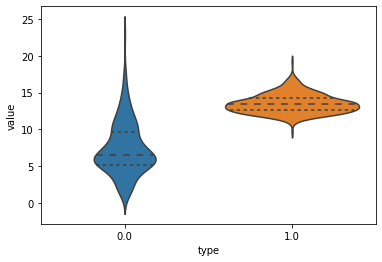

In [9]:
sns.violinplot( x = "type", y = "value", data = dataset, inner = "quartile");

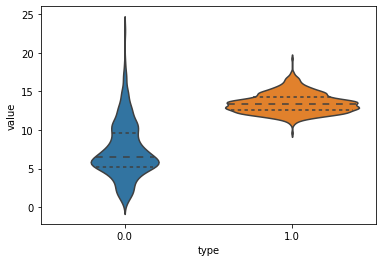

In [11]:
sns.violinplot( x = "type", y = "value", data = dataset, inner = "quartile", bw = 0.2);

## Empirical Cumulative Distribution Functions

- We don't know how many bins to group the data in a visualization plot.

Pros:
- The ECDF removes the problem of using too many bins or too few bins in a plot.
- THe ECDF does not have this issue because it does not need to group the data or summarize it.

Cons:
- Its much more difficult to understand the data from its visual representation. 

### Dataset

In [4]:
example_dataset = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Python\\Bootcamps\\Python for Statistical Analysis\\1D\\example_1.txt"
example_dataset2 = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Python\\Bootcamps\\Python for Statistical Analysis\\1D\example_2.txt"

d1 = np.loadtxt(example_dataset)
d2 = np.loadtxt(example_dataset2)

print(d1.shape, d2.shape)

(500,) (500,)


#### ECDF

- If you have 100 data points, the first data point is the first percentile.
- If you have 1000 data points, the first data point is the 0.1 percentile.
- 0.1 very close to zero, so this is an approximation.
    - We could improve this by using 1/d1.size
    
- Steep inclines in the underlying distribution causes the increases in the CDF to also become more steep.
- Greater variability in the underlying distribution causes the CDF to taper off. 

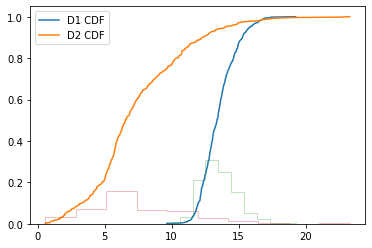

In [17]:
sd1 = np.sort(d1)
sd2 = np.sort(d2)

cdf = np.linspace(1/d1.size,1, d1.size)

plt.plot(sd1, cdf, label = "D1 CDF")
plt.plot(sd2, cdf, label = "D2 CDF")
plt.hist(d1,histtype = "step", density = True, alpha = 0.3)
plt.hist(d2,histtype = "step", density = True, alpha = 0.3)
plt.legend();

### Pandas DataFrame Describe Method

In [18]:
df = pd.DataFrame({"Data1": d1, "Data2": d2})
df.describe()

,Data1,Data2
count,500.000000,500.000000
mean,13.511172,7.390714
std,1.296363,3.589993
min,9.640000,0.568000
25%,12.572000,5.164750
50%,13.389500,6.531000
75%,14.291250,9.664500
max,19.262000,23.307000


## N Dimension Analysis

### Dataset

In [3]:
data_file_original = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Python\\\
Bootcamps\\Python for Statistical Analysis\\PreparingDatasets\\Diabetes.csv"

df_original = pd.read_csv(data_file_original)

In [4]:
df_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
cols = [c for c in df_original.columns if c not in ["Pregnancies", "Outcome"]]
df = df_original.copy()
df[cols] = df[cols].replace({0: np.NaN})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### N Dimension Scatter Matrix

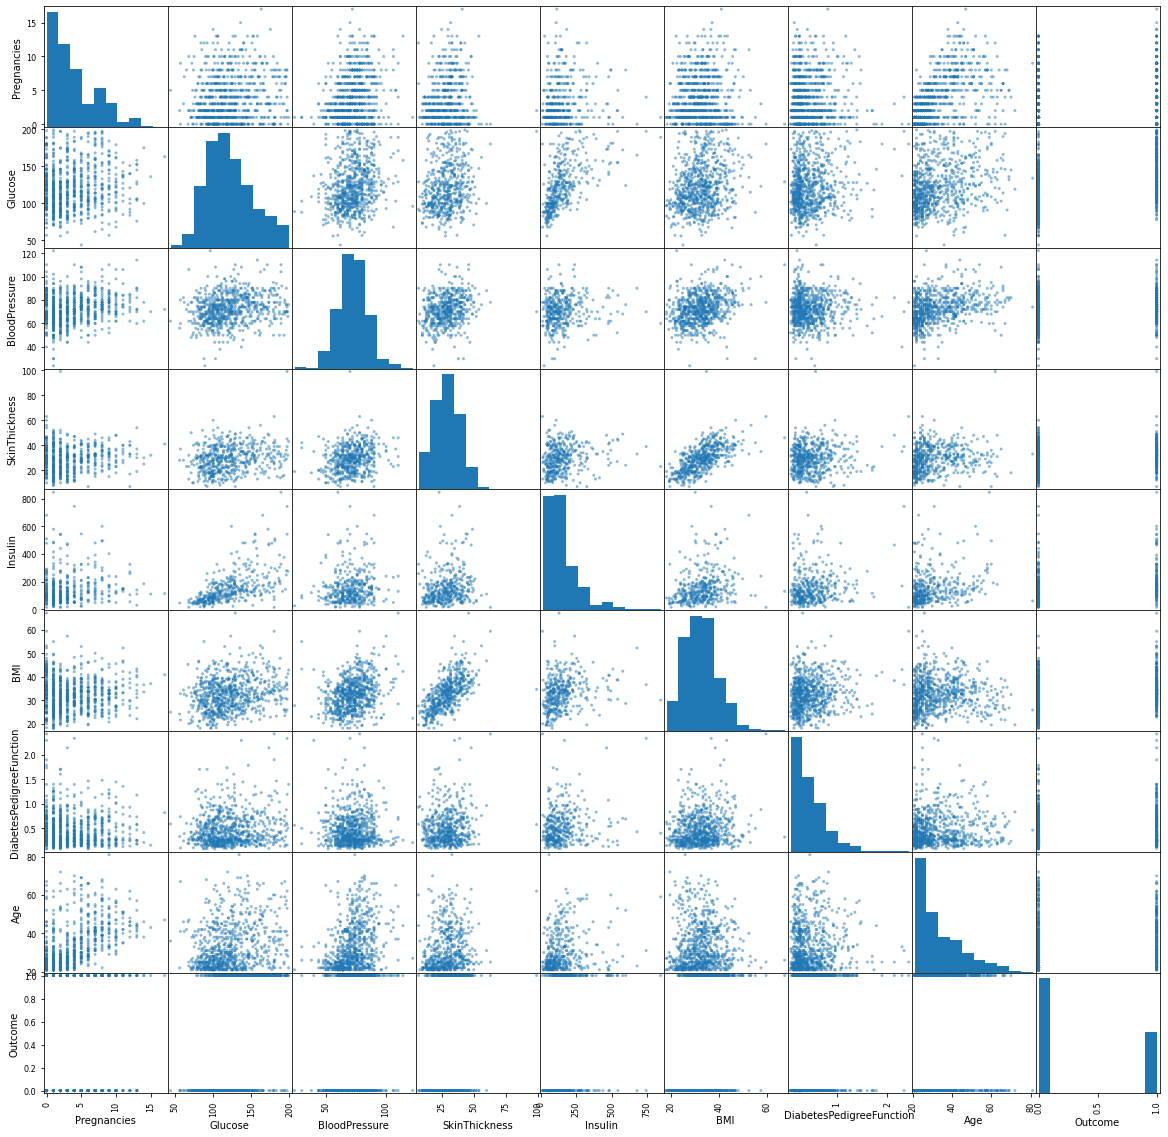

In [8]:
pd.plotting.scatter_matrix(df, figsize = (20,20));

To read the pair plot look at all the graphs below the diagnal.

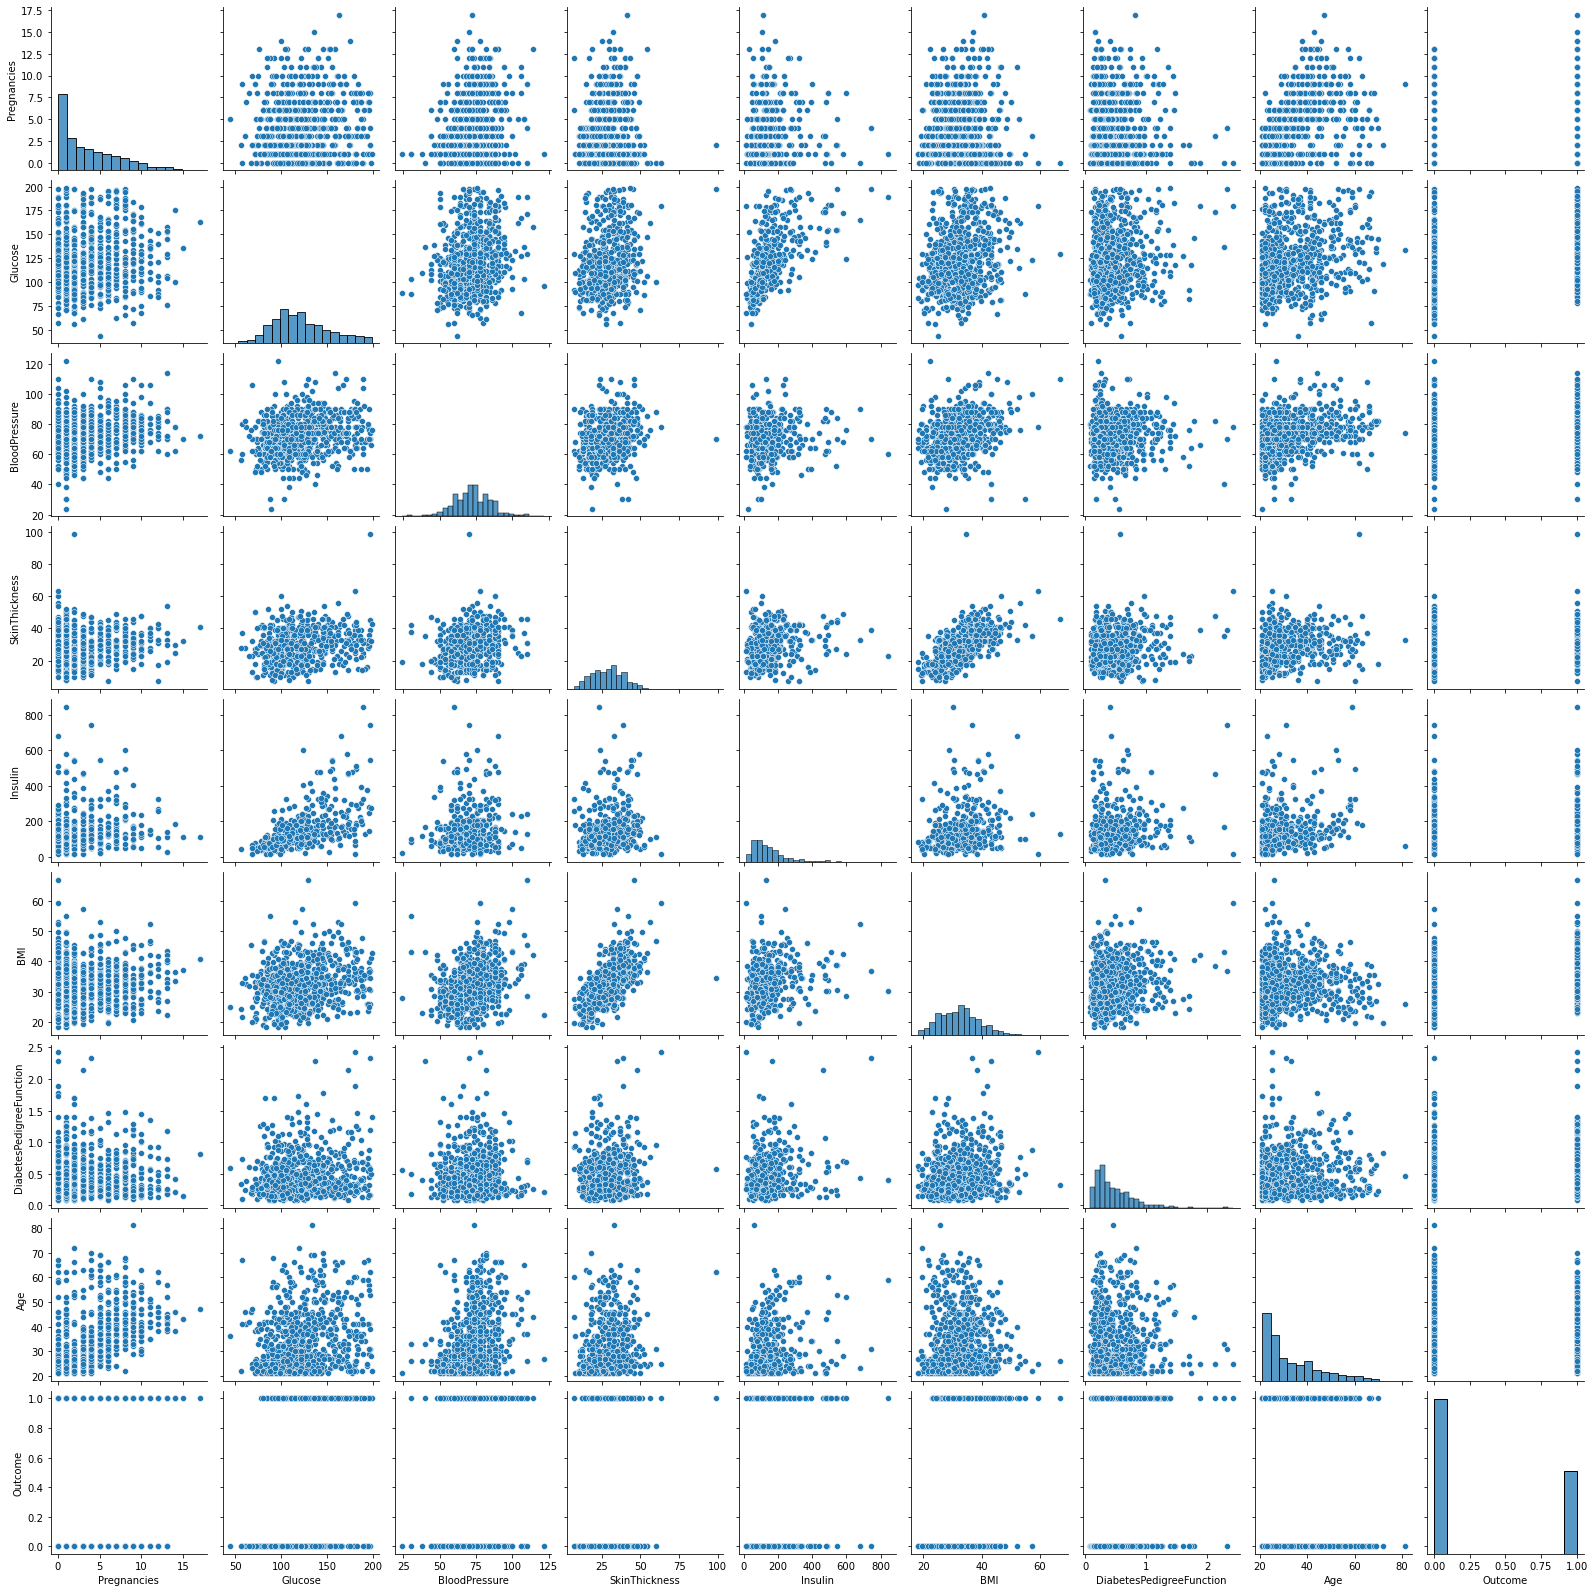

In [9]:
sns.pairplot(df )

Droping the NaN entries and giving color to each data point in the Outcome Column

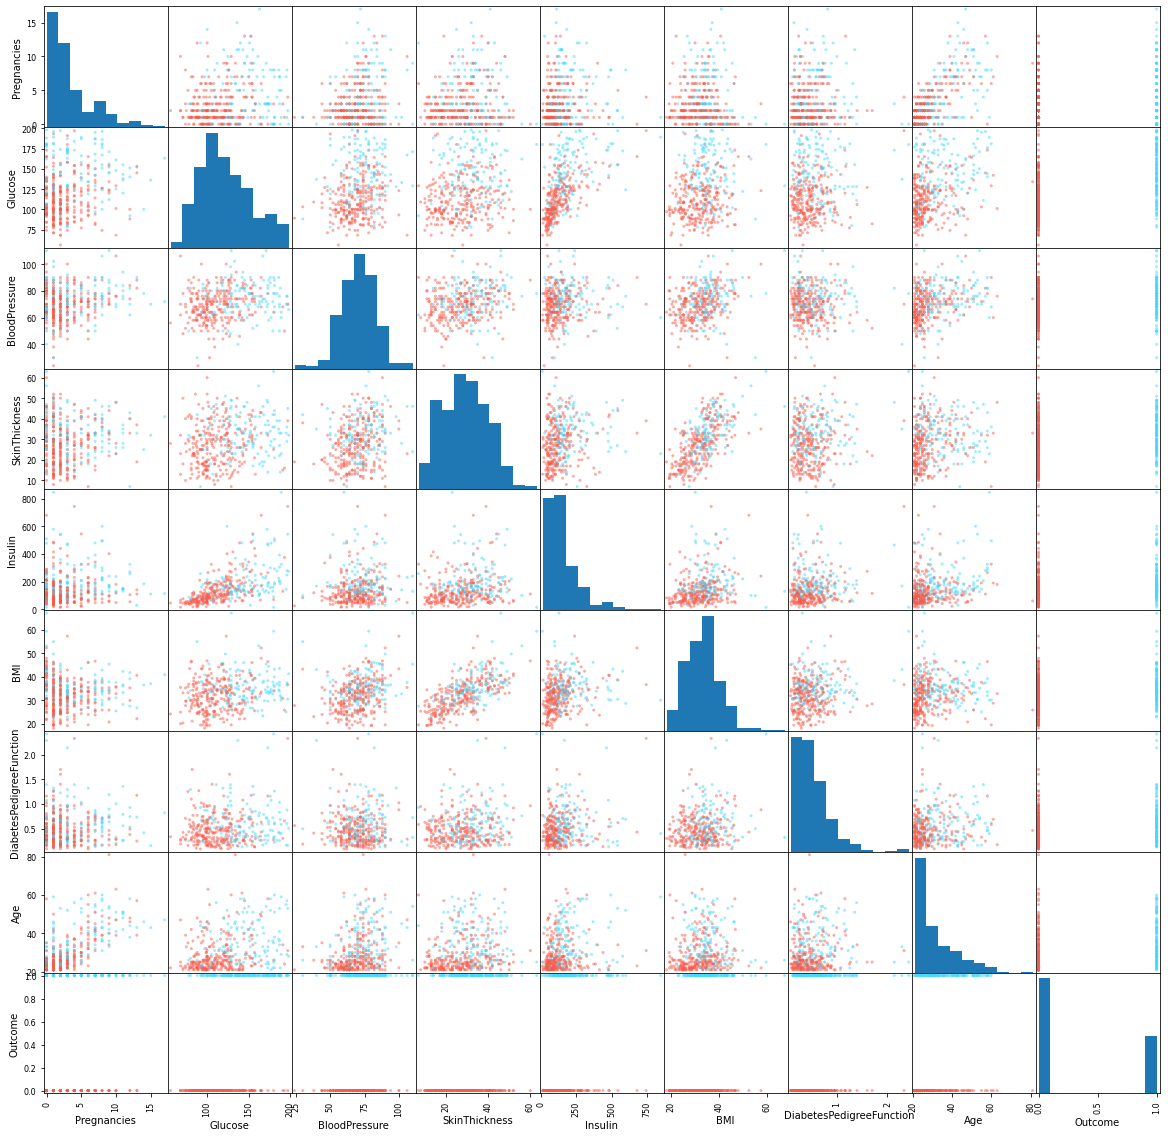

In [10]:
df2 = df.dropna()
colors = df2["Outcome"].map(lambda x: "#44d9ff" if x else "#f95b4a")
pd.plotting.scatter_matrix(df2, figsize = (20,20), color = colors);

### N Dimension Correlation

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<AxesSubplot:>

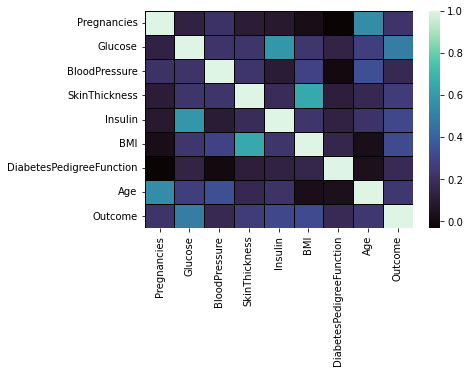

In [12]:
sns.heatmap(df.corr(), cmap = "mako", linecolor = "black", linewidths = 1)

<AxesSubplot:>

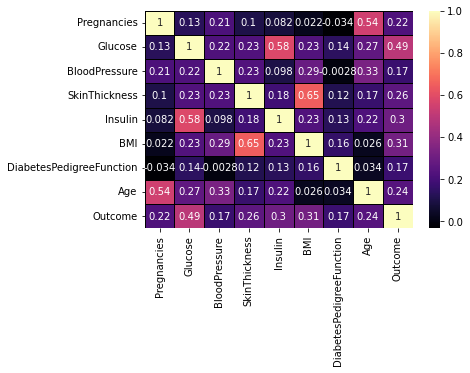

In [13]:
sns.heatmap(df.corr(), cmap = "magma", linecolor = "black", linewidths = 1, annot = True)

### 2D Histograms

#### Dataset

In [14]:
histo_data_2d = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Python\\Bootcamps\\Python for Statistical Analysis\\ND\\height_weight.csv"

In [15]:
df2 = pd.read_csv(histo_data_2d)
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4231 non-null   int64  
 1   height  4231 non-null   float64
 2   weight  4231 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 99.3 KB


,sex,height,weight
count,4231.000000,4231.000000,4231.000000
mean,1.540061,66.903607,174.095122
std,0.498451,4.313004,38.896171
min,1.000000,55.400000,96.590000
25%,1.000000,63.730000,144.315000
50%,2.000000,66.630000,170.100000
75%,2.000000,69.970000,198.660000
max,2.000000,79.610000,298.440000


Text(0, 0.5, 'weight')

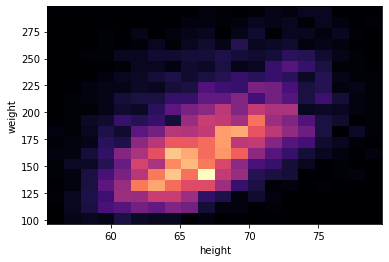

In [16]:
plt.hist2d(df2["height"],df2["weight"], bins = 20, cmap = "magma")
plt.xlabel("height")
plt.ylabel("weight")

### Contour Plots

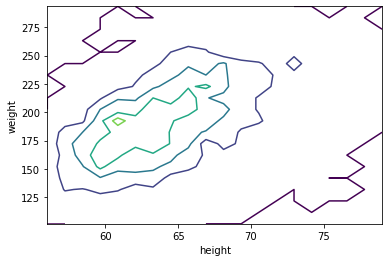

In [5]:
hist, x_edge, y_edge = np.histogram2d(df2["height"],df2["weight"], bins = 20)

x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

plt.contour(x_center, y_center, hist, levels = 4)
plt.xlabel("height")
plt.ylabel("weight");

The level is not smooth because there is not enough data in the data set.
- To better visualize this data set we should use a KDE Plots.

C:\Users\pyria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pyria\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using (2, 20) for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ValueError: `bw_method` should be 'scott', 'silverman', a scalar or a callable.

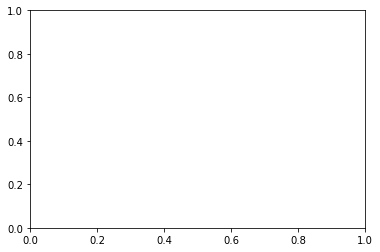

In [6]:
sns.kdeplot(df2["height"],df2["weight"], cmap = "viridis", bw= (2, 20));
plt.hist2d(df2["height"],df2["weight"], bins = 20, cmap = "magma", alpha = 0.3);

### KDE Plot

C:\Users\pyria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height', ylabel='weight'>

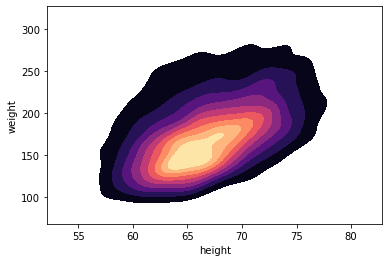

In [7]:
sns.kdeplot(df2["height"], df2["weight"], cmap = "magma", shade = True)

We can see that the peak lies at 65 inches and 150 lbs.

In defense of simplicity

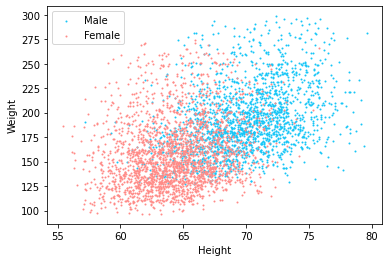

In [8]:
m = df2["sex"] == 1
plt.scatter(df2.loc[m, "height"], df2.loc[m, "weight"], c = "#16c6f7", s=1 , label = "Male")
plt.scatter(df2.loc[~m, "height"], df2.loc[~m, "weight"], c = "#ff8b87", s=1, label = "Female")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc = 2);

Remember when you are visualizing a dataset, start simple and then add complexity as the data would indicate. There is no point in wasting time getting deep when its not necessary. 

Never use Pie Charts ever. 

## Summary

1. Know what you are looking for
    - Start by having questions that you want to answer.
    - Having questions will allow you to investigate the relationships that you think would impact that answer.
    - Its better to have questions than to look at everything and hope to get lucky.
2. Take a moment to prepare your dataset
3. Develop a feel for your dataset by using plots
    - Understand the distributions
    - Understand the relationships between attributes
        - Make sure to have labels and tables in your plots. 